In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
theblackmamba31_landscape_image_colorization_path = kagglehub.dataset_download('theblackmamba31/landscape-image-colorization')

print('Data source import complete.')


100%|██████████| 192M/192M [00:01<00:00, 102MB/s]

Extracting files...


Data source import complete.


# **CV Task 4**



## **DJS Synapse Learning Period**

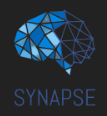



**Generative AI**, or GenAI, is an aspect of artificial intelligence where machines don’t just classify or predict—they actually create.



Imagine AI models capable of generating breathtaking images, composing music, writing stories, or even creating synthetic medical images to aid in diagnostics. From artistic tools like DALL-E and Midjourney to language models like GPT, GenAI is reshaping industries by bringing creativity to machines.



In this task, you’ll get into this exciting world by building a **Convolutional Autoencoder**, a model that captures patterns and reconstructs images, giving you a firsthand look at how AI learns to create and recreate data!



Go through this before we start-

https://research.ibm.com/blog/what-is-generative-AI



https://www.youtube.com/watch?v=qiUEgSCyY5o


## Importing and Installing

In [ ]:
# Install necessary libraries

!pip install tensorflow keras opencv-python tqdm

In [ ]:
# Import necessary libraries

import numpy as np

import matplotlib.pyplot as plt

import cv2

import os

import re

from tqdm import tqdm

from keras import layers, models

from keras.datasets import mnist

from keras.preprocessing.image import img_to_array

from sklearn.model_selection import train_test_split

import tensorflow as tf

import keras


Preprocess the data-

1. Loading the data

2. Normalize the data to range [0, 1]

3. Reshape data to fit the model input shape (28, 28, 1)

4. Train test split on the data- training set and a validation set (80-20 split)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models

# Load the MNIST dataset
(X_train_full, _), (X_test_full, _) = mnist.load_data()

# Normalize pixel values to range [0,1]
X_train_full = X_train_full.astype('float32') / 255.0
X_test_full = X_test_full.astype('float32') / 255.0

# Reshape data to include the channel dimension (grayscale)
X_train_full = np.reshape(X_train_full, (len(X_train_full), 28, 28, 1))
X_test_full = np.reshape(X_test_full, (len(X_test_full), 28, 28, 1))

# Split training data into train and validation sets
X_train, X_val, _, _ = train_test_split(X_train_full, X_train_full, test_size=0.2, random_state=42)

# Define input shape
input_shape = (28, 28, 1)

# Creating the autoencoder



Generative AI, or GenAI, refers to techniques where models learn to generate new data based on existing patterns. Autoencoders are an example of this because they generate (or reconstruct) an output image based on what they’ve learned about similar images. Such models are essential in real-world applications like image denoising, colorization, anomaly detection, and even in sophisticated applications like image generation and text-to-image models.





In this task, we will create a neural network model called an **autoencoder**, which is a foundational technique in GenAI. Autoencoders learn to compress data (in this case, images) into a compact representation and then reconstruct it as closely as possible to the original. Here, we use **convolutional layers** to capture spatial features from images.



But first, what exactly is an autoencoder? Go through these-



https://www.v7labs.com/blog/autoencoders-guide



https://www.youtube.com/watch?v=xwrzh4e8DLs

In [ ]:
# Function to create the convolutional autoencoder

def create_autoencoder(input_shape):

  # Define the input layer for the encoder


    encoder_input = layers.Input(shape= input_shape)



    # Encoder layers: these layers will learn to compress the input data

    # Apply a 2D convolution with 32 filters, 3x3 kernel, ReLU activation and padding
    x=layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoder_input)

    # Then a 2x2 MaxPooling with padding to reduce spatial dimensions by half
    x=layers.MaxPooling2D(2,2,padding='same')(x)

    # Finally a 2D convolution with 16 filters, 3x3 kernel, ReLU activation, and 'same' padding
    x=layers.Conv2D(16,(3,3),activation='relu',padding='same')(x)



    latent_space = layers.MaxPooling2D((2, 2), padding='same')(x)



    # Decoder layers: these layers will learn to reconstruct the input data from the latent space representation

    # Apply a 2D convolution Transpose with 16 filters, 3x3 kernel, ReLU activation and padding
    x=layers.Conv2DTranspose(16,(3,3),activation='relu',padding='same')(latent_space)

    # Upsampling to double the spatial dimensions, reversing the effect of max pooling
    x=layers.UpSampling2D((2,2))(x)

    # Another 2D convolution Transpose with 32 filters
    x=layers.Conv2DTranspose(32,(3,3),activation='relu',padding='same')(x)

    # Another upsampling layer to continue restoring the original spatial dimensions
    x=layers.UpSampling2D((2,2))(x)

    decoder_output = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)



    # Create and return the autoencoder model

    autoencoder = models.Model(encoder_input, decoder_output)   # Combine encoder and decoder layers into a single model

    return autoencoder


In [ ]:
# Create the model with input shape (28, 28, 1)

input_shape = (28,28,1)

autoencoder = create_autoencoder(input_shape)



# Compile the model with Adam optimizer and binary crossentropy loss

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
# Train the autoencoder

history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, validation_data=(X_val, X_val))

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 74s 374ms/step - loss: 0.3182 - val_loss: 0.0968
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 70s 370ms/step - loss: 0.0919 - val_loss: 0.0842
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 68s 360ms/step - loss: 0.0829 - val_loss: 0.0797
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 85s 378ms/step - loss: 0.0793 - val_loss: 0.0773
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 68s 364ms/step - loss: 0.0769 - val_loss: 0.0757
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 81s 357ms/step - loss: 0.0753 - val_loss: 0.0744
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 86s 379ms/step - loss: 0.0743 - val_loss: 0.0736
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 70s 371ms/step - loss: 0.0733 - val_loss: 0.0727
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 69s 366ms/step - loss: 0.0726 - val_loss: 0.0721
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 87s 393ms/step - loss: 0.0722 - val_loss: 0.0716


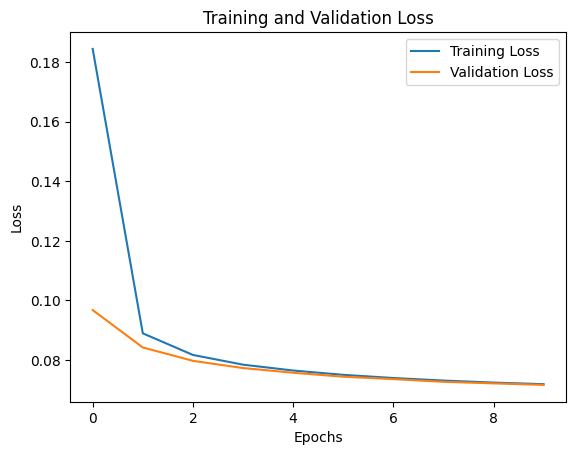

In [ ]:
# Print training and validation loss
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [ ]:
# Evaluate on the test dataset after training
test_loss=autoencoder.evaluate(X_test_full,X_test_full)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0703


NameError: name 'decoded_test_images' is not defined

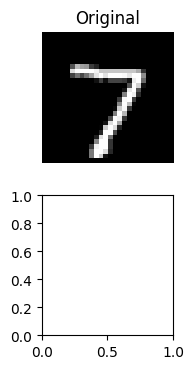

In [ ]:
# Plot original and reconstructed images


n = 10  # Number of images to display

plt.figure(figsize=(20, 4))

for i in range(n):

    # Display original



    ax = plt.subplot(2, n, i + 1)

    plt.imshow(X_test_full[i].reshape(28, 28), cmap='gray')

    plt.title("Original")

    plt.axis('off')



    # Display reconstruction

    ax = plt.subplot(2, n, i + 1 + n)

    plt.imshow(decoded_test_images[i].reshape(28, 28), cmap='gray')

    plt.title("Reconstructed")

    plt.axis('off')



plt.show()

# Generative Adverserial Networks (GAN)



Okay now you have seen how an autoencoder works, now lets look into GANs.



A Generative Adversarial Network (GAN) is a deep learning model where two neural networks, called the **Generator** and the **Discriminator**, compete with each other to improve.



The Generator's job is to create realistic-looking data (like images) from random input, while the Discriminator’s job is to determine whether a given data sample is real or generated. As they train together, the Generator gets better at “fooling” the Discriminator by producing increasingly realistic data, and the Discriminator gets better at spotting the fakes. This adversarial training process results in a Generator that can produce highly realistic samples.



In this task, we’ll use a GAN to generate colorized images from grayscale inputs, aiming for results that closely match real color images.



Go through these resources: https://developer.ibm.com/articles/generative-adversarial-networks-explained/



The architecture-  https://medium.com/@marcodelpra/generative-adversarial-networks-dba10e1b4424



The maths behind GANs- https://www.youtube.com/watch?v=Gib_kiXgnvA


In [ ]:
# Loading and Processing the grascale, colour images



def sorted_alphanumeric(data):

    convert = lambda text: int(text) if text.isdigit() else text.lower()

    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]

    return sorted(data,key = alphanum_key)

# defining the size of the image



SIZE =  256

color_img = []

path = '../input/landscape-image-colorization/landscape Images/color'

files = os.listdir(path)

files = sorted_alphanumeric(files)

for i in tqdm(files):

        if i == '4200.jpg':

            break

        else:

            img = cv2.imread(path + '/'+i,1)

            # convert to RGB

            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            #resizing image and normalizing it

            img = cv2.resize(img, (SIZE, SIZE))

            img = img.astype('float32') / 255.0

            img = img_to_array(img)

            color_img.append(img_to_array(img))



gray_img = []

path = '../input/landscape-image-colorization/landscape Images/gray'

files = os.listdir(path)

files = sorted_alphanumeric(files)

for i in tqdm(files):

         if i == '4200.jpg':

            break

         else:

            img = cv2.imread(path + '/'+i,1)

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            #resizing image

            img = cv2.resize(img, (SIZE, SIZE))

            img = img.astype('float32') / 255.0

            gray_img.append(img_to_array(img))

In [ ]:
# preparing training and testing datasets



batch_size=16

color_dataset=tf.data.Dataset.from_tensor_slices(np.array(color_img[:4000])).batch(batch_size)

gray_dataset=tf.data.Dataset.from_tensor_slices(np.array(gray_img[:4000])).batch(batch_size)



color_dataset_t=tf.data.Dataset.from_tensor_slices(np.array(color_img[4000:])).batch(batch_size)

gray_dataset_t=tf.data.Dataset.from_tensor_slices(np.array(gray_img[4000:])).batch(batch_size)

Color_test = color_img[4000:]

Gray_test = gray_img[4000:]

print("Number of batches:", color_dataset.cardinality().numpy())

for batch in color_dataset.take(1):

    print("Shape of one batch:", batch.shape)

In [ ]:
example_color = next(iter(color_dataset))

example_gray = next(iter(gray_dataset))

In [ ]:
# define a function plot_images that displays pairs of color and grayscale images side by side

def plot_images(a=4):
    """Displays 'a' pairs of color and grayscale images side by side."""

    # Fetch 'a' examples from datasets
    example_color = next(iter(color_dataset.take(a)))
    example_gray = next(iter(gray_dataset.take(a)))

    # Convert tensors to numpy arrays for visualization
    example_color = example_color.numpy()
    example_gray = example_gray.numpy()

    # Plot images
    plt.figure(figsize=(8, 2 * a))  # Adjust figure size based on 'a'

    for i in range(a):
        # Grayscale image
        plt.subplot(a, 2, 2 * i + 1)
        plt.imshow(example_gray[i], cmap="gray")  # Show as grayscale
        plt.axis("off")
        plt.title("Grayscale Image")

        # Color image
        plt.subplot(a, 2, 2 * i + 2)
        plt.imshow(example_color[i])  # Show as RGB
        plt.axis("off")
        plt.title("Color Image")

    plt.show()

# Example usage
plot_images(4)  # Display 4 pairs of grayscale and color images





NameError: name 'color_dataset' is not defined

In [ ]:
# call the function

plot_images(3)

The code block below defines two helper functions, **downsample** and **upsample**, used for creating downsampling and upsampling layers respectively.

In [ ]:
def downsample(filters, size, apply_batchnorm=True):

  # Initialize a Sequential model

  result = tf.keras.Sequential()

  result.add(tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',

                             kernel_initializer='he_normal', use_bias=False))



  if apply_batchnorm: # what does batch norm do here?normalizes the inputs to a layer

    result.add(tf.keras.layers.BatchNormalization())



  # Add a Leaky ReLU activation to introduce non-linearity
  result.add(tf.keras.layers.LeakyReLU())



  return result



def upsample(filters, size, apply_dropout=False):

  # Initialize a Sequential model

  result = tf.keras.Sequential()



  # Add a Conv2DTranspose layer with parameters same as the Convolution layer
  result.add(tf.keras.layers.Conv2DTranspose(filters, size, strides=2,

                                            padding='same',

                                            kernel_initializer='he_normal',

                                            use_bias=False))




  # Apply batch normalization
  result.add(tf.keras.layers.BatchNormalization())



  if apply_dropout:  # What's the reason to add a dropout layer here?to prevent overfitting

      result.add(tf.keras.layers.Dropout(0.5))



  # Apply relu activation
  result.add(tf.keras.layers.ReLU())



  return result

# Defining the Generator Model



Generative Adversarial Networks (GANs) uses a unit architecture allowing the model to iteratively improve. Look into these to understand its architecture better- https://www.geeksforgeeks.org/u-net-architecture-explained/




Create a **down_stack** and an **up_stack** consisting of layers of the functions you have written above. Don't forget to vary the filter size according to the number of layers you create!

In [ ]:
def Generator():

  # Define the input layer of the model


  # Input layer: expects images of size 256x256 with 3 color channels (RGB)

  inputs = tf.keras.Input(shape=(256,256,3))


  # Downsampling stack: reduces spatial dimensions while increasing feature depth

  down_stack = [
      tf.keras.layers.Conv2D(64,4,strides=2,padding='same',kernel_iniializer='he_normal',use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),

      tf.keras.layers.Conv2D(128,4,strides=2,padding='same',kernel_iniializer='he_normal',use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),

      tf.keras.layers.Conv2D(256,4,strides=2,padding='same',kernel_iniializer='he_normal',use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),

      tf.keras.layers.Conv2D(512,4,strides=2,padding='same',kernel_iniializer='he_normal',use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),





  ]



 # Upsampling stack: increases spatial dimensions while decreasing feature depth

  up_stack = [
      tf.keras.layers.Conv2DTranspose(512,4,strides=2,padding='same',kernel_iniializer='he_normal',use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),

      tf.keras.layers.Conv2DTranspose(256,4,strides=2,padding='same',kernel_iniializer='he_normal',use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),

      tf.keras.layers.Conv2DTranspose(128,4,strides=2,padding='same',kernel_iniializer='he_normal',use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),

      tf.keras.layers.Conv2DTranspose(64,4,strides=2,padding='same',kernel_iniializer='he_normal',use_bias=False),
      tf.keras.layers.BatchNormalization(),
      tf.keras.layers.LeakyReLU(),





  ]



  # initializer for the final layer. This initializes the weights of the final layer's kernel with a normal distribution

  initializer = tf.random_normal_initializer(0., 0.02)



  # add a convo transpose layer as the last layer (in the parameteres include the kernel_initializer, padding and tanh activation function)

  # additionally, what no. of filters and kernel size will be required here? think and mention it in the parameters

  last = tf.keras.layers.Conv2DTranspose(3,4,strides=2,padding='same',kernel_initializer=initializer,activation='tanh')



  x = inputs



  # Downsampling through the model

  skips = []

  for down in down_stack:

    x = down(x)

    skips.append(x)



  skips = reversed(skips[:-1])



  # Upsampling and establishing the skip connections

  for up, skip in zip(up_stack, skips):

    x = up(x)

    x = tf.keras.layers.Concatenate()([x, skip])



  x = last(x)



  return tf.keras.Model(inputs=inputs, outputs=x)


What do you understand by the skip connections used here? Why are they necessary?

Answer:

In [ ]:
def Discriminator():

  # Initialize the kernel initializer for the convolutional layers

  initializer = tf.random_normal_initializer(0,0.02)

  ''' Define input layers for the images and name the layers input_image and target_image respectively

   1. Input image (real or generated) with shape [SIZE, SIZE, 3]

   2. Target image (ground truth) with shape [SIZE, SIZE, 3]

  '''

  inp = tf.keras.layers.Input(shape=(256,256,3),name='input_image')

  tar = tf.keras.layers.Input(shape=(256,256,3),name='target_image')



  x = tf.keras.layers.concatenate([inp, tar]) # (bs, 256, 256, channels*2)





  # create 3 downsampling layers


  down1 = tf.keras.layers.Conv2D(64,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x)

  down1 = tf.keras.layers.BatchNormalization()(down1)

  down1 = tf.keras.layers.LeakyReLU()(down1)

  down2= tf.keras.layers.Conv2D(128,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x)

  down2 = tf.keras.layers.BatchNormalization()(down2)

  down2 = tf.keras.layers.LeakyReLU()(down2)

  down3 = tf.keras.layers.Conv2D(256,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x)

  down3 = tf.keras.layers.BatchNormalization()(down3)

  down3 = tf.keras.layers.LeakyReLU()(down3)



  # create 3 upsampling layers

  down1 = tf.keras.layers.Conv2D(256,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x)

  down1 = tf.keras.layers.BatchNormalization()(down1)

  down1 = tf.keras.layers.LeakyReLU()(down1)

  down2= tf.keras.layers.Conv2D(128,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x)

  down2 = tf.keras.layers.BatchNormalization()(down2)

  down2 = tf.keras.layers.LeakyReLU()(down2)

  down3 = tf.keras.layers.Conv2D(64,4,strides=2,padding='same',kernel_initializer=initializer,use_bias=False)(x)

  down3 = tf.keras.layers.BatchNormalization()(down3)

  down3 = tf.keras.layers.LeakyReLU()(down3)




  # now we require 2 more layers- zero padding and a convo 2d layer (again, kernel_initializer in the parameters here along w required kernel size and 512 no. of filters)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)

  conv = tf.keras.layers.Conv2D(512,4,strides=1,kernel_initializer=initializer,use_bias=False)(zero_pad1)



  # Apply bactch normalization, leaky relu and another layer of zero padding

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

  zero_pad2 =  tf.keras.layers.BatchNormalization()(conv)
  # (bs, 33, 33, 512)



  last = tf.keras.layers.Conv2D(1, 4, strides=1,

                                kernel_initializer=initializer)(zero_pad2)



  return tf.keras.Model(inputs=[inp, tar], outputs=last)


In [ ]:
generator = Generator()

generator.summary()

NameError: name 'tf' is not defined

In [ ]:
discriminator = Discriminator()

discriminator.summary()

NameError: name 'tf' is not defined

In [ ]:
# Define Binary Cross-Entropy as the loss function for both generator and discriminator

loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)



# Define adam optimizers for generator and discriminator with 2e-4 learning rate and 0.5 beta_1 value

generator_optimizer = tf.keras.optimizers.Adam(2e-4,beta_1=0.5)

discriminator_optimizer = tf.keras.optimizers.Adam(2e-4,beta_1=0.5)



# LAMBDA is a constant that controls the weight of the L1 loss in the generator loss

LAMBDA = 100

In [ ]:
def generator_loss(disc_generated_output, gen_output, target):

  # GAN Loss - Encourage generator to make discriminator classify outputs as real

  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)



  # L1 Loss - Calculate mean absolute error between generated and target images

  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))



  # Total Generator Loss - Combine GAN loss and weighted L1 loss

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)



  return total_gen_loss, gan_loss, l1_loss



def discriminator_loss(disc_real_output, disc_generated_output):

  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)



  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)



  # Total Discriminator Loss - Combine real loss and generated loss

  total_disc_loss = real_loss + generated_loss



  return total_disc_loss

The block of code below performs a single training iteration in a GAN model by updating the generator and discriminator. Each training step involves:

1. generating an output with the generator

2. evaluating it with the discriminator

3. calculating losses

4. computing gradients

5. applying those gradients to optimize both models

In [ ]:
def train_step(input_image, target, epoch):

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

    gen_output = generator(input_image, training=True)



    disc_real_output = discriminator([input_image, target], training=True)

    disc_generated_output = discriminator([input_image, gen_output], training=True)



    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)

    disc_loss = discriminator_loss(disc_real_output, disc_generated_output)



  generator_gradients = gen_tape.gradient(gen_total_loss,

                                          generator.trainable_variables)

  discriminator_gradients = disc_tape.gradient(disc_loss,

                                               discriminator.trainable_variables)



  generator_optimizer.apply_gradients(zip(generator_gradients,

                                          generator.trainable_variables))

  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,

                                              discriminator.trainable_variables))




In [ ]:
import time



# training the GAN model

def fit(train_ds, epochs,):

  for epoch in range(epochs):

    start = time.time()

    print("Epoch: ", epoch+1)



    # Train

    for n, (input_image, target) in train_ds.enumerate():

      train_step(input_image, target, epoch)

    print()



    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,

                                                        time.time()-start))


Define a function **generate_images** to visualize the generator's output by comparing the model's predictions with the actual ground truth image

In [ ]:
def generate_images(model, test_input, tar):

  prediction = model(test_input, training=True)



  # List of images to display: input, ground truth, and predicted output

  # write the code

  test_input=test_input.numpy()

  tar=tar.numpy()

  prediction=prediction.numpy()

  def normalize_image(img):
    return (img+1)/2

  test_input=normalize_image(test_input)

  tar=normalize_image(tar)

  prediction=normalize_image(prediction)

  plt.figure(figsize=(15, 5))

  titles=['input image','ground truth','predicted image']

  images=[test_input,tar,prediction]

  for i in range(3):

    plt.subplot(1,3,i+1)

    plt.title(titles[i])

    plt.imshow(images[i][0])



for example_input, example_target in tf.data.Dataset.zip((gray_dataset,color_dataset)).take(2):

  generate_images(generator, example_input, example_target)


NameError: name 'gray_dataset' is not defined

In [ ]:
import tensorflow as tf

tf.keras.backend.clear_session()

In [ ]:
# fit the data to train it on both the gray_dataset and the color_dataset for 2 epochs (use the zip function)

fit(tf.data.Dataset.zip((gray_dataset,color_dataset)),epochs=2)


In [ ]:
generator.compile(loss= tf.keras.losses.MeanSquaredError()
                  , optimizer=  tf.keras.optimizers.Adam(2e-4,beta_1=0.5)
                  , metrics= ['mae']
                  ) # set values as required



for example_input, example_target in tf.data.Dataset.zip((gray_dataset_t,color_dataset_t)).take(11):

    Gray_test = example_input

    Color_test = example_target



ModelLoss, ModelAccuracy = generator.evaluate( Gray_test, Color_test)



print('Test Loss is {}'.format(ModelLoss))

print('Test Accuracy is {}'.format(ModelAccuracy ))

In [ ]:
# Function to generate images and their distributions

def generate_images_and_distribution(model, gray_dataset, color_dataset, num_images):

    # Create a combined dataset

    dataset = tf.data.Dataset.zip((gray_dataset, color_dataset)).shuffle(buffer_size=1000).take(num_images)



    for example_input, example_target in dataset:
      input_image = example_input.numpy()
        target_image = example_target.numpy()



        # Extract single examples from the batch


        for idx in range(num_images):

            input_image = example_input[idx]

            target_image = example_target[idx]



            # Add batch dimension
            input_image = tf.expand_dims(input_image, axis=0)

            target_image = tf.expand_dims(target_image, axis=0)

            input_image = tf.expand_dims(input_image, axis=0)  # Shape: (1, 256, 256, 3)

            target_image = tf.expand_dims(target_image, axis=0)  # Shape: (1, 256, 256, 3)



            # Predict color images from the grayscale input


            predictions = model(input_image, training=True)



            # Plot images

            plt.figure(figsize=(15, 5))
            # Create a new figure for the images





            # Plot grayscale input

            plt.subplot(1, 3, 1)

            plt.title('Input Image')

            plt.imshow(tf.squeeze(input_image), cmap='gray')

            plt.axis('off')



            # Plot ground truth color image

            plt.subplot(1, 3, 2)

            plt.title('Ground Truth')

            plt.imshow(tf.squeeze(target_image))

            plt.axis('off')



            # Plot predicted color image

            plt.subplot(1, 3, 3)

            plt.title('Predicted')

            plt.imshow(tf.squeeze(predictions))

            plt.axis('off')



            plt.tight_layout()

            plt.show()  # Show the images



            # Plot color distributions side by side

            plt.figure(figsize=(15, 5))  # Create a new figure for color distributions



            # Ground truth color distribution

            plt.subplot(1, 2, 1)

            colors = ('r', 'g', 'b')

            for i, color in enumerate(colors):

                histogram, bin_edges = np.histogram(target_image.numpy()[..., i], bins=256, range=(0, 1))

                plt.plot(bin_edges[0:-1], histogram, color=color, alpha=0.5, label=f'{color.upper()} channel')



            plt.title('Ground Truth Distribution')

            plt.xlabel('Pixel Value')

            plt.ylabel('Frequency')

            plt.legend()



            # Predicted color distribution

            plt.subplot(1, 2, 2)

            for i, color in enumerate(colors):

                histogram, bin_edges = np.histogram(predictions.numpy()[..., i], bins=256, range=(0, 1))

                plt.plot(bin_edges[0:-1], histogram, color=color, alpha=0.5, label=f'{color.upper()} channel')



            plt.title('Predicted Distribution')

            plt.xlabel('Pixel Value')

            plt.ylabel('Frequency')

            plt.legend()



            plt.tight_layout()

            plt.show()
             # Show the distribution plots


In [ ]:
num_images_to_display = 4# Change this to the desired number of images

generate_images_and_distribution(generator, gray_dataset_t, color_dataset_t, num_images_to_display)

# **End of Task**



> ©Synapse 2024 - 2025
